Logistic Regression on Building_01 Data from T_315500_234500_NW.bin

Not Completed Yet
 
For Reference: https://elitedatascience.com/imbalanced-classes

In [ ]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm



In [ ]:
#Reading CSV File, Building_01, which is actually building_0000 
df = pd.read_csv('building_01.csv', names = ['X','Y','Z','R','G','B','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification'])
#df1 = df.dropna() 
#df2 = df1.values

#print(df2[:, 14])
from sklearn.utils import resample 
df_majority = df[df.Classification == 2]
df_minority = df[df.Classification == 4] 

#print(df_majority)
#downsampling majority class 

df_majority_downsampled = resample(df_majority, replace = False, n_samples = 5000, random_state=123)
df_minority_downsampled = resample(df_minority, replace = False, n_samples = 5000, random_state=123)
df_downsampled = pd.concat([df_majority_downsampled, df_minority_downsampled])

#display class counts 
df_downsampled.Classification.value_counts()


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2    5000
4    5000
Name: Classification, dtype: int64

In [ ]:
#with downsampling
xOld = df_downsampled.drop('Classification', axis = 1)
#print(x)
y = df_downsampled.Classification
#print(y)
#print(x.shape,y.shape)

scaler = preprocessing.StandardScaler().fit(xOld)
scaler.mean_
scaler.scale_
x = scaler.transform(xOld)

x.mean(axis = 0)
x.std(axis=0)


array([1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.])

In [ ]:
'''
#df = pd.read_csv('building_01_small.csv', names = ['X','Y','Z','R','G','B','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification'])
df = pd.read_csv('building_01_small.csv')
df1 = df.dropna() 
df2 = df1.values
print(df2)
'''

"\n#df = pd.read_csv('building_01_small.csv', names = ['X','Y','Z','R','G','B','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification'])\ndf = pd.read_csv('building_01_small.csv')\ndf1 = df.dropna() \ndf2 = df1.values\nprint(df2)\n"

In [ ]:
#Reading CSV File #2, Building_0000001 txt 
df_a = pd.read_csv('Buildings_000001.txt',sep = ' ')
df_a1 = df_a.dropna() 
df_a2 = df_a1.values

#Reading CSV File #2, Building_0000001 txt 
df_b = pd.read_csv('Buildings_000002.txt',sep = ' ')
df_b1 = df_b.dropna() 
df_b2 = df_b1.values

In [ ]:
'''
#CELL ISN'T USED
#Checking to see if everything is working 
#df.info()
#df.head(3)
classifier_count = df['Classification'].value_counts().to_frame()
classifier_count.head(2)

#df_a.info()
#df_a.head(3)
'''

"\n#CELL ISN'T USED\n#Checking to see if everything is working \n#df.info()\n#df.head(3)\nclassifier_count = df['Classification'].value_counts().to_frame()\nclassifier_count.head(2)\n\n#df_a.info()\n#df_a.head(3)\n"

In [ ]:
'''
#For edited CSV 
x = df2[:, :14] 
y = df2[:, 14]
print(x.shape, y.shape)
'''

'\n#For edited CSV \nx = df2[:, :14] \ny = df2[:, 14]\nprint(x.shape, y.shape)\n'

In [ ]:
#without upsampling
#I will use all the attributes (building_000000 CSV)
#x = df2[:, :14] 
#y = df2[:, 14]

#with upsampling 
#x = df_downsampled.drop('Classification', axis = 1)
#print(x)
#y = df_downsampled.Classification
#print(y)
#print(x.shape,y.shape)

In [ ]:
#For building 000001
x1Old = df_a2[:, :14] 
y1 = df_a2[:, 14] 

scaler = preprocessing.StandardScaler().fit(x1Old)
x1 = scaler.transform(x1Old)

#For building 000002
x2Old = df_b2[:, :14] 
y2 = df_b2[:, 14] 

scaler = preprocessing.StandardScaler().fit(x2Old)
x2 = scaler.transform(x2Old)

In [ ]:
#Train/Test Split
x_scaled = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, train_size = 0.75)

#Making sure that 
y_train=y_train.astype('int')
y_test = y_test.astype('int')
print(x_train.shape, x_test.shape)
#print(y_train)

(7500, 14) (2500, 14)


In [ ]:
'''
#SVM - LINEAR 
from sklearn import svm
cVals = [0.01, 0.1, 1, 10, 100]

acc_train_svm_linear = []
acc_test_svm_linear = []
#train
print("Train Accuracy using a Linear kernel")
for c in cVals: 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train, y_train)

    yhat_svc_linear_train = svc_linear.predict(x_train)
    acc_train_linear = np.mean(yhat_svc_linear_train == y_train)
    acc_train_svm_linear.append(acc_train_linear)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_linear)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))
#print("Train Accuracy: ",acc_train_linear)
'''

'\n#SVM - LINEAR \nfrom sklearn import svm\ncVals = [0.01, 0.1, 1, 10, 100]\n\nacc_train_svm_linear = []\nacc_test_svm_linear = []\n#train\nprint("Train Accuracy using a Linear kernel")\nfor c in cVals: \n    svc_linear = svm.SVC(probability = False, kernel = \'linear\', C = c)\n    svc_linear.fit(x_train, y_train)\n\n    yhat_svc_linear_train = svc_linear.predict(x_train)\n    acc_train_linear = np.mean(yhat_svc_linear_train == y_train)\n    acc_train_svm_linear.append(acc_train_linear)\n    print("Train Accuracy(c=" + str(c) + "):", acc_train_linear)\n    #print(\'Train Accuracy = {0:f}\'.format(acc_train_linear))\n#print("Train Accuracy: ",acc_train_linear)\n'

In [ ]:
#SVM - POLYNOMIAL
from sklearn import svm
cVals = [0.01, 0.1, 1, 10, 100]

acc_train_svm_poly = []
acc_test_svm_poly = []
#train
print("Train Accuracy using a Poly kernel")
for c in cVals: 
    svc_poly = svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_poly.fit(x_train, y_train)

    yhat_svc_poly_train = svc_poly.predict(x_train)
    acc_train_poly = np.mean(yhat_svc_poly_train == y_train)
    acc_train_svm_poly.append(acc_train_poly)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_poly)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

    yhat_svc_poly_test = svc_poly.predict(x_test)
    acc_test_poly = np.mean(yhat_svc_poly_test == y_test)
    acc_test_svm_poly.append(acc_test_poly)
    print("Test Accuracy (c=",c,"): ", acc_test_poly)

    yhat_poly_building_000001_SVM = svc_poly.predict(x1)
    acc_poly_building_000001_SVM = np.mean(yhat_poly_building_000001_SVM == y1)
    print("POLY (other building):",acc_poly_building_000001_SVM)

    yhat_poly_building_000002_SVM = svc_poly.predict(x2)
    acc_poly_building_000002_SVM = np.mean(yhat_poly_building_000002_SVM == y2)
    print("POLY (other building):",acc_poly_building_000002_SVM)

#print("Train Accuracy: ",acc_train_linear)

Train Accuracy using a Poly kernel
Train Accuracy(c=0.01): 0.7292
Test Accuracy (c= 0.01 ):  0.7192
POLY (other building): 0.8394573282589054
POLY (other building): 0.8559629001867036
Train Accuracy(c=0.1): 0.8016
Test Accuracy (c= 0.1 ):  0.7936
POLY (other building): 0.8070120198231252
POLY (other building): 0.8024942569282525
Train Accuracy(c=1): 0.8332
Test Accuracy (c= 1 ):  0.8244
POLY (other building): 0.8153081619801221
POLY (other building): 0.6920250888347802
Train Accuracy(c=10): 0.8462666666666666
Test Accuracy (c= 10 ):  0.83
POLY (other building): 0.7936642663527093
POLY (other building): 0.6561599284159446
Train Accuracy(c=100): 0.8542666666666666
Test Accuracy (c= 100 ):  0.8396
POLY (other building): 0.6659639131506174
POLY (other building): 0.5395949306099271


In [ ]:

#SVM - RBF
from sklearn import svm
cVals = [0.01, 0.1, 1, 10, 100]

acc_train_svm_rbf = []
acc_test_svm_rbf = []
#train
print("RBF kernel")
for c in cVals: 
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf.fit(x_train, y_train)

    yhat_svc_rbf_train = svc_rbf.predict(x_train)
    acc_train_rbf = np.mean(yhat_svc_rbf_train == y_train)
    acc_train_svm_rbf.append(acc_train_rbf)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_rbf)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

    yhat_svc_rbf_test = svc_rbf.predict(x_test)
    acc_test_rbf = np.mean(yhat_svc_rbf_test == y_test)
    acc_test_svm_rbf.append(acc_test_rbf)
    print("Test Accuracy (c=",c,"): ", acc_test_rbf)

    yhat_rbf_building_000001_SVM = svc_rbf.predict(x1)
    acc_rbf_building_000001_SVM = np.mean(yhat_rbf_building_000001_SVM == y1)
    print("RBF (other building):",acc_rbf_building_000001_SVM)

    yhat_rbf_building_000002_SVM = svc_rbf.predict(x2)
    acc_rbf_building_000002_SVM = np.mean(yhat_rbf_building_000002_SVM == y2)
    print("RBF (other building):",acc_rbf_building_000002_SVM)
#print("Train Accuracy: ",acc_train_linear)


RBF kernel
Train Accuracy(c=0.01): 0.7608
Test Accuracy (c= 0.01 ):  0.742
RBF (other building): 0.8385674780275443
RBF (other building): 0.7427318953427344
Train Accuracy(c=0.1): 0.8228
Test Accuracy (c= 0.1 ):  0.8144
RBF (other building): 0.8310379760698737
RBF (other building): 0.714820996842386
Train Accuracy(c=1): 0.8528
Test Accuracy (c= 1 ):  0.836
RBF (other building): 0.7812337431207732
RBF (other building): 0.6091355709086529
Train Accuracy(c=10): 0.8664
Test Accuracy (c= 10 ):  0.8524
RBF (other building): 0.7573446869096186
RBF (other building): 0.6084902819482564
Train Accuracy(c=100): 0.8822666666666666
Test Accuracy (c= 100 ):  0.8532
RBF (other building): 0.7466801741368453
RBF (other building): 0.639304980770389


In [ ]:
'''
#SVM - SIGMOID
from sklearn import svm
cVals = [0.01, 0.1, 1, 10, 100]

acc_train_svm_sigmoid = []
acc_test_svm_sigmoid = []
#train
print(" SIGMOID kernel")
for c in cVals: 
    svc_sigmoid = svm.SVC(probability = False, kernel = 'sigmoid', C = c)
    svc_sigmoid.fit(x_train, y_train)

    yhat_svc_sigmoid_train = svc_sigmoid.predict(x_train)
    acc_train_sigmoid = np.mean(yhat_svc_sigmoid_train == y_train)
    acc_train_svm_sigmoid.append(acc_train_sigmoid)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_sigmoid)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

    yhat_svc_sigmoid_test = svc_sigmoid.predict(x_test)
    acc_test_sigmoid = np.mean(yhat_svc_sigmoid_test == y_test)
    acc_test_svm_sigmoid.append(acc_test_sigmoid)
    print("Test Accuracy (c=",c,"): ", acc_test_sigmoid)
#print("Train Accuracy: ",acc_train_linear)
'''



'\n#SVM - SIGMOID\nfrom sklearn import svm\ncVals = [0.01, 0.1, 1, 10, 100]\n\nacc_train_svm_sigmoid = []\nacc_test_svm_sigmoid = []\n#train\nprint(" SIGMOID kernel")\nfor c in cVals: \n    svc_sigmoid = svm.SVC(probability = False, kernel = \'sigmoid\', C = c)\n    svc_sigmoid.fit(x_train, y_train)\n\n    yhat_svc_sigmoid_train = svc_sigmoid.predict(x_train)\n    acc_train_sigmoid = np.mean(yhat_svc_sigmoid_train == y_train)\n    acc_train_svm_sigmoid.append(acc_train_sigmoid)\n    print("Train Accuracy(c=" + str(c) + "):", acc_train_sigmoid)\n    #print(\'Train Accuracy = {0:f}\'.format(acc_train_linear))\n\n    yhat_svc_sigmoid_test = svc_sigmoid.predict(x_test)\n    acc_test_sigmoid = np.mean(yhat_svc_sigmoid_test == y_test)\n    acc_test_svm_sigmoid.append(acc_test_sigmoid)\n    print("Test Accuracy (c=",c,"): ", acc_test_sigmoid)\n#print("Train Accuracy: ",acc_train_linear)\n'

In [ ]:
'''
#Logistic Regression 
logreg = LogisticRegression(C=1000).fit(x_train,y_train)
yhat_train = logreg.predict(x_train)
print(np.unique(yhat_train))
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy for Train Data:",accuracy_train)

yhat_test = logreg.predict(x_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy for Test Data:",accuracy_test)
'''


'\n#Logistic Regression \nlogreg = LogisticRegression(C=1000).fit(x_train,y_train)\nyhat_train = logreg.predict(x_train)\nprint(np.unique(yhat_train))\naccuracy_train = accuracy_score(y_train, yhat_train)\nprint("Accuracy for Train Data:",accuracy_train)\n\nyhat_test = logreg.predict(x_test)\naccuracy_test = accuracy_score(y_test, yhat_test)\nprint("Accuracy for Test Data:",accuracy_test)\n'

In [ ]:
'''
#Logistic Regression 
logreg = linear_model.LogisticRegression(C=10**8) #using a large c value = no regularization
logreg.fit(x_train, y_train)
yhat_train = logreg.predict(x_train)
#print(yhat_train)

#finding accuracy of applying model on training data
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy on train set:",accuracy_train)

#finding accuracy of applying model on test data 
yhat_test = logreg.predict(x_test)
#print(yhat_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy on test set:",accuracy_test)
'''

'\n#Logistic Regression \nlogreg = linear_model.LogisticRegression(C=10**8) #using a large c value = no regularization\nlogreg.fit(x_train, y_train)\nyhat_train = logreg.predict(x_train)\n#print(yhat_train)\n\n#finding accuracy of applying model on training data\naccuracy_train = accuracy_score(y_train, yhat_train)\nprint("Accuracy on train set:",accuracy_train)\n\n#finding accuracy of applying model on test data \nyhat_test = logreg.predict(x_test)\n#print(yhat_test)\naccuracy_test = accuracy_score(y_test, yhat_test)\nprint("Accuracy on test set:",accuracy_test)\n'

In [ ]:
'''
#SVM for other building - ALREADY INCLUDED ABOVE 
svc_poly = svm.SVC(probability = False, kernel = 'poly', C = 1)
svc_poly.fit(x_train, y_train)

yhat_poly_building_000001_SVM = svc_poly.predict(x1)
acc_poly_building_000001_SVM = np.mean(yhat_poly_building_000001_SVM == y1)
print("POLY:",acc_poly_building_000001_SVM)

svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = 1)
svc_rbf.fit(x_train, y_train)

yhat_rbf_building_000001_SVM = svc_rbf.predict(x1)
acc_rbf_building_000001_SVM = np.mean(yhat_rbf_building_000001_SVM == y1)
print("RBF:",acc_rbf_building_000001_SVM)
'''


'\n#SVM for other building - ALREADY INCLUDED ABOVE \nsvc_poly = svm.SVC(probability = False, kernel = \'poly\', C = 1)\nsvc_poly.fit(x_train, y_train)\n\nyhat_poly_building_000001_SVM = svc_poly.predict(x1)\nacc_poly_building_000001_SVM = np.mean(yhat_poly_building_000001_SVM == y1)\nprint("POLY:",acc_poly_building_000001_SVM)\n\nsvc_rbf = svm.SVC(probability = False, kernel = \'rbf\', C = 1)\nsvc_rbf.fit(x_train, y_train)\n\nyhat_rbf_building_000001_SVM = svc_rbf.predict(x1)\nacc_rbf_building_000001_SVM = np.mean(yhat_rbf_building_000001_SVM == y1)\nprint("RBF:",acc_rbf_building_000001_SVM)\n'

In [ ]:
'''
Logistic Regression model on other building
#finding accuracy of applying model to a different building 
yhat_building_000001 = logreg.predict(x1)
print(yhat_building_000001)
accuracy_building_000001 = accuracy_score(y1, yhat_building_000001)
print("Accuracy on a different building (01):",accuracy_building_000001)
'''

'\nLogistic Regression model on other building\n#finding accuracy of applying model to a different building \nyhat_building_000001 = logreg.predict(x1)\nprint(yhat_building_000001)\naccuracy_building_000001 = accuracy_score(y1, yhat_building_000001)\nprint("Accuracy on a different building (01):",accuracy_building_000001)\n'

In [ ]:
'''
#Logistic Regression Model Parameters (w/o Regularization)
w = logreg.coef_ 
intercept = logreg.intercept_

precision, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average='binary',pos_label=2)
print("Coefficient:",w)
print("Intercept:",intercept)
print("Precision:",precision)
print("Recall:",recall)
print("Fscore:",fscore)
'''

'\n#Logistic Regression Model Parameters (w/o Regularization)\nw = logreg.coef_ \nintercept = logreg.intercept_\n\nprecision, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average=\'binary\',pos_label=2)\nprint("Coefficient:",w)\nprint("Intercept:",intercept)\nprint("Precision:",precision)\nprint("Recall:",recall)\nprint("Fscore:",fscore)\n'

In [ ]:
'''
#confusion matrices for LOGISTIC REGRESSION
np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = linear_model.LogisticRegression(C=10**8).fit(x_train,y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
'''

'\n#confusion matrices for LOGISTIC REGRESSION\nnp.set_printoptions(precision=2)\nclass_names = [\'2\',\'4\']\nclassifier = linear_model.LogisticRegression(C=10**8).fit(x_train,y_train)\n\n# Plot non-normalized confusion matrix\ntitles_options = [("Confusion matrix, without normalization", None),\n                  ("Normalized confusion matrix", \'true\')]\nfor title, normalize in titles_options:\n    disp = plot_confusion_matrix(classifier, x_test, y_test,\n                                 display_labels=class_names,\n                                 cmap=plt.cm.Blues,\n                                 normalize=normalize)\n    disp.ax_.set_title(title)\n\n    print(title)\n    print(disp.confusion_matrix)\n\nplt.show()\n'

In [ ]:
'''
#Confusion Matrix for SVM Poly for regular set of Data 

np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = svm.SVC(probability = False, kernel = 'poly', C = 1).fit(x_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


#Confusion Matrix for SVM Poly for other building1 set of Data 
np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = svm.SVC(probability = False, kernel = 'poly', C = 1).fit(x_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x2, y2,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
'''

'\n#Confusion Matrix for SVM Poly for regular set of Data \n\nnp.set_printoptions(precision=2)\nclass_names = [\'2\',\'4\']\nclassifier = svm.SVC(probability = False, kernel = \'poly\', C = 1).fit(x_train, y_train)\n\n# Plot non-normalized confusion matrix\ntitles_options = [("Confusion matrix, without normalization", None),\n                  ("Normalized confusion matrix", \'true\')]\nfor title, normalize in titles_options:\n    disp = plot_confusion_matrix(classifier, x_test, y_test,\n                                 display_labels=class_names,\n                                 cmap=plt.cm.Blues,\n                                 normalize=normalize)\n    disp.ax_.set_title(title)\n\n    print(title)\n    print(disp.confusion_matrix)\n\nplt.show()\n\n\n#Confusion Matrix for SVM Poly for other building1 set of Data \nnp.set_printoptions(precision=2)\nclass_names = [\'2\',\'4\']\nclassifier = svm.SVC(probability = False, kernel = \'poly\', C = 1).fit(x_train, y_train)\n\n# Plot non-no

Confusion matrix, without normalization
[[3447  313]
 [ 938 2802]]
Normalized confusion matrix
[[0.92 0.08]
 [0.25 0.75]]


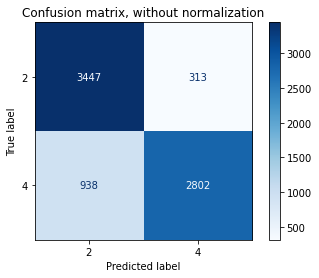

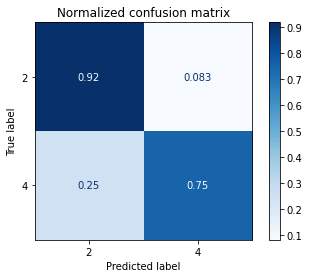

'\n#Confusion Matrix for SVM Poly for other building1 set of Data \nnp.set_printoptions(precision=2)\nclass_names = [\'2\',\'4\']\nclassifier = svm.SVC(probability = False, kernel = \'poly\', C = 1).fit(x_train, y_train)\n\n# Plot non-normalized confusion matrix\ntitles_options = [("Confusion matrix, without normalization", None),\n                  ("Normalized confusion matrix", \'true\')]\nfor title, normalize in titles_options:\n    disp = plot_confusion_matrix(classifier, x2, y2,\n                                 display_labels=class_names,\n                                 cmap=plt.cm.Blues,\n                                 normalize=normalize)\n    disp.ax_.set_title(title)\n\n    print(title)\n    print(disp.confusion_matrix)\n\nplt.show()\n'

In [ ]:
#Confusion Matrix for SVM Poly for train set of Data 

np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = svm.SVC(probability = False, kernel = 'poly', C = 1).fit(x_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

'''
#Confusion Matrix for SVM Poly for other building1 set of Data 
np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = svm.SVC(probability = False, kernel = 'poly', C = 1).fit(x_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x2, y2,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
'''

Confusion matrix, without normalization
[[142296  60796]
 [ 10794  18568]]
Normalized confusion matrix
[[0.7  0.3 ]
 [0.37 0.63]]


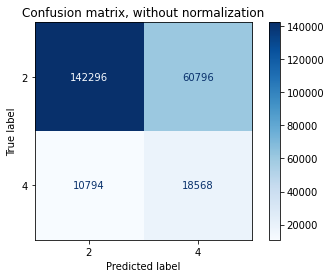

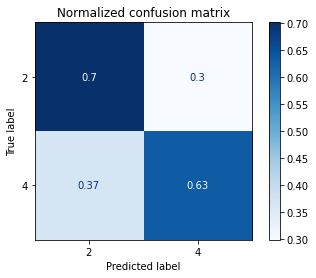

In [ ]:

#Confusion Matrix for SVM Poly for other building2 set of Data 
np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = svm.SVC(probability = False, kernel = 'poly', C = 1).fit(x_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x2, y2,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


Confusion matrix, without normalization
[[48635  7747]
 [ 5744 10920]]
Normalized confusion matrix
[[0.86 0.14]
 [0.34 0.66]]


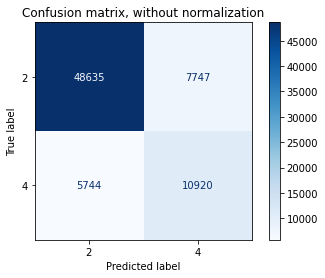

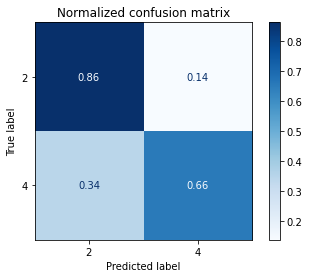

In [ ]:

#Confusion Matrix for SVM Poly for other building1 set of Data 
np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = svm.SVC(probability = False, kernel = 'poly', C = 1).fit(x_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x1, y1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


Confusion matrix, without normalization
[[44482 11900]
 [ 4080 12584]]
Normalized confusion matrix
[[0.79 0.21]
 [0.24 0.76]]


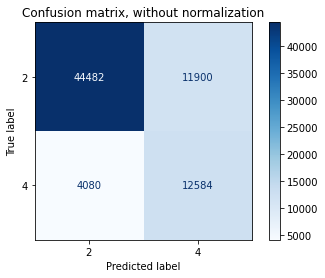

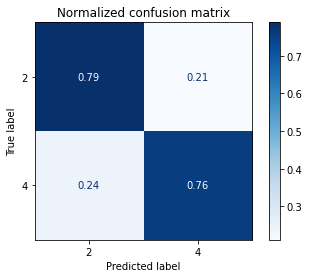

In [ ]:

#Confusion Matrix for RBF for other test set of Data 
np.set_printoptions(precision=2)
class_names = ['2','4']
classifier =  svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = 1).fit(x_train, y_train)


# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x1, y1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22ec9222-3a33-4967-8b6b-eec8dcc0f029' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>